In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [1]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [3]:
import pandas as pd

df = pd.DataFrame(lista_alumnos, columns=['Nombre', "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [4]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["Edad"]], df["Altura"], test_size=0.4, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1)
(9, 1)
(12,)
(9,)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [50]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.score(X_train, y_train)

0.06237563602461882

In [52]:
lm.score(X_test, y_test)

0.10148441604944669

# Ejercicio 5

Analiza los coeficientes.

In [53]:
lm.intercept_

np.float64(1.8263273453093813)

In [54]:
lm.coef_

array([-0.00327345])

# Ejercicio 6

Evalúa visualmente el modelo.

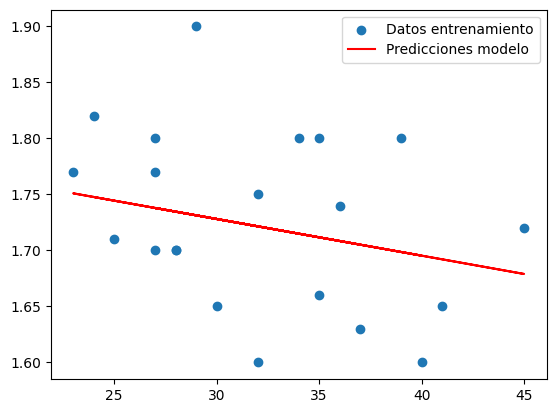

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'], df['Altura'], label="Datos entrenamiento")
plt.plot(df['Edad'], lm.predict(df[['Edad']]), color="r", label="Predicciones modelo")
plt.legend()

# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [56]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(0.003563002537838497)

In [57]:
df_eval = pd.DataFrame(X_test)
df_eval['Prediccion'] = y_pred
df_eval["Valor_real"] = y_test
df_eval['error'] = abs(df_eval['Prediccion'] - df_eval["Valor_real"])
df_eval

,Edad,Prediccion,Valor_real,error
0,24,1.747764,1.82,0.072236
17,34,1.715030,1.80,0.084970
15,32,1.721577,1.75,0.028423
1,25,1.744491,1.71,0.034491
8,36,1.708483,1.74,0.031517
5,27,1.737944,1.80,0.062056
11,30,1.728124,1.65,0.078124
3,37,1.705210,1.63,0.075210
18,27,1.737944,1.77,0.032056
